In [22]:
import json;
import urllib2
import os.path
import re;
from pymongo import MongoClient;

def getUserInput():
    FileExists=os.path.isfile('RitoMongo.conf') ;
    res=[];
    if (FileExists):
        with open('RitoMongo.conf') as f:
            for line in f:
                res.append(line.rstrip('\n'));
                print line.rstrip('\n');
    elif (not FileExists):
        SummonerName= raw_input('Enter your Summoner name: ');
        Region  = (raw_input('Enter your region: ')).upper();
        Key = raw_input('Enter your API Key which you retrieved from Riot website: ');
        f = open('RitoMongo.conf','w');
        f.write(SummonerName+'\n'+Region+'\n'+Key);
        f.close();
    return res;

#================================= Main =============================================================================
_InputFields= getUserInput();
SummonerName=_InputFields[0];
Region=_InputFields[1];
Key=_InputFields[2];

BearsAreScary
NA
d8eb3b3a-6401-42af-bb07-a021fd8d9545


In [23]:
from riotwatcher import RiotWatcher
from collections import defaultdict

w = RiotWatcher(key=Key)
f = open('pulled_summoners.txt','r').readlines()
f = [x.strip() for x in f]

g = w.get_league_entry(summoner_ids=['20627791'])

tier_dict = defaultdict(list)

g

{u'20627791': [{u'entries': [{u'division': u'I',
     u'isFreshBlood': False,
     u'isHotStreak': False,
     u'isInactive': False,
     u'isVeteran': False,
     u'leaguePoints': 75,
     u'losses': 27,
     u'playerOrTeamId': u'20627791',
     u'playerOrTeamName': u'BearsAreScary',
     u'playstyle': u'NONE',
     u'wins': 35}],
   u'name': u"Xerath's Renegades",
   u'queue': u'RANKED_SOLO_5x5',
   u'tier': u'GOLD'}]}

In [90]:
#Find their tier and division
print(g['20627791'][0]['tier'],g['20627791'][0]['entries'][0]['division'])

(u'GOLD', u'I')


In [176]:
my_ranked_stats = w.get_ranked_stats('20627791')

In [224]:
from collections import defaultdict

my_ranked_dict = defaultdict(list)
player_ranked_dict = defaultdict(list)

for item in my_ranked_stats['champions']:
    #if item['id'] != 0:
    won_games = float(item['stats']['totalSessionsWon'])
    lost_games = float(item['stats']['totalSessionsLost'])
    played_games = float(item['stats']['totalSessionsPlayed'])
    player_ranked_dict[item['id']] (int(played_games))
    player_ranked_dict[item['id']] =(win_perc)
del(player_ranked_dict[0])
my_ranked_dict
#x = max(player_ranked_dict, key=player_ranked_dict.get)
#print(x,player_ranked_dict[x])

# top_five_id = sorted(player_ranked_dict, key=player_ranked_dict.get, reverse=True)[:5]
# top_five_values = []
# for index, item in enumerate(top_five_id):
#      top_five_values.append([item,player_ranked_dict[item]])
        
# top_five_values

# for item in top_five_values:
#     print item

TypeError: 'list' object is not callable

In [349]:
from itertools import chain
import pandas as pd
import cPickle as pickle
champ_dict = pickle.load(open('Riot-API-Code/role_id/champion_id_to_name.pkl'))
dicts = [tag_dict, player_ranked_dict]
super_dict = {}

# for d in dicts:
#     for k, v in d.iteritems():
#         super_dict.setdefault(k, []).extend(v)
columns = ['Name']



,Name,1
1,Annie,NaN
2,Olaf,NaN
3,Galio,NaN
4,Twisted Fate,NaN
5,Xin Zhao,NaN
6,Urgot,NaN
7,LeBlanc,NaN
8,Vladimir,NaN
9,Fiddlesticks,NaN
10,Kayle,NaN


In [213]:
champ_dict = pickle.load(open('Riot-API-Code/role_id/champion_id_to_name.pkl'))
for k,v in champ_dict.iteritems():
    champ_dict[k] = v.replace("'"," ").replace(" ","").replace(".","")
champ_dict[31] = u'Chogath'
champ_dict[121] = u'Khazix'
champ_dict[161] = u'Velkoz'

In [159]:
for k,v in champ_dict.iteritems():
    print(k,v)

(1, u'Annie')
(2, u'Olaf')
(3, u'Galio')
(4, u'TwistedFate')
(5, u'XinZhao')
(6, u'Urgot')
(7, u'LeBlanc')
(8, u'Vladimir')
(9, u'Fiddlesticks')
(10, u'Kayle')
(11, u'MasterYi')
(12, u'Alistar')
(13, u'Ryze')
(14, u'Sion')
(15, u'Sivir')
(16, u'Soraka')
(17, u'Teemo')
(18, u'Tristana')
(19, u'Warwick')
(20, u'Nunu')
(21, u'MissFortune')
(22, u'Ashe')
(23, u'Tryndamere')
(24, u'Jax')
(25, u'Morgana')
(26, u'Zilean')
(27, u'Singed')
(28, u'Evelynn')
(29, u'Twitch')
(30, u'Karthus')
(31, u'Chogath')
(32, u'Amumu')
(33, u'Rammus')
(34, u'Anivia')
(35, u'Shaco')
(36, u'DrMundo')
(37, u'Sona')
(38, u'Kassadin')
(39, u'Irelia')
(40, u'Janna')
(41, u'Gangplank')
(42, u'Corki')
(43, u'Karma')
(44, u'Taric')
(45, u'Veigar')
(48, u'Trundle')
(50, u'Swain')
(51, u'Caitlyn')
(53, u'Blitzcrank')
(54, u'Malphite')
(55, u'Katarina')
(56, u'Nocturne')
(57, u'Maokai')
(58, u'Renekton')
(59, u'JarvanIV')
(60, u'Elise')
(61, u'Orianna')
(62, u'Wukong')
(63, u'Brand')
(64, u'LeeSin')
(67, u'Vayne')
(68, u'

In [292]:
tag_dict = defaultdict(list)
champ_dict = defaultdict(list)
tag_list = ['Fighter','Mage','Tank','Support','Marksman','Assassin']
#tag_dict[0].append(u'All')
#tag_dict[0].append(tag_list)
for key, value in tags['data'].iteritems():
    tag_dict[value['id']].append(value['name'])
    champ_dict[value['id']] = value['name']
    tag_dict[value['id']].append(value['tags'])

pickle.dump(champ_dict,open('Riot-API-Code/role_id/champion_id_to_name.pkl','w'))    
champs = pickle.load(open('Riot-API-Code/role_id/champion_id_to_name.pkl'))

tag_dict

defaultdict(list,
            {1: [u'Annie', [u'Mage']],
             2: [u'Olaf', [u'Fighter', u'Tank']],
             3: [u'Galio', [u'Tank', u'Mage']],
             4: [u'Twisted Fate', [u'Mage']],
             5: [u'Xin Zhao', [u'Fighter', u'Assassin']],
             6: [u'Urgot', [u'Marksman', u'Fighter']],
             7: [u'LeBlanc', [u'Assassin', u'Mage']],
             8: [u'Vladimir', [u'Mage', u'Tank']],
             9: [u'Fiddlesticks', [u'Mage', u'Support']],
             10: [u'Kayle', [u'Fighter', u'Support']],
             11: [u'Master Yi', [u'Assassin', u'Fighter']],
             12: [u'Alistar', [u'Tank', u'Support']],
             13: [u'Ryze', [u'Mage', u'Fighter']],
             14: [u'Sion', [u'Tank', u'Fighter']],
             15: [u'Sivir', [u'Marksman']],
             16: [u'Soraka', [u'Support', u'Mage']],
             17: [u'Teemo', [u'Marksman', u'Assassin']],
             18: [u'Tristana', [u'Marksman', u'Assassin']],
             19: [u'Warwick', [u'Fight

In [317]:
my_ranked_dict = defaultdict(list)
player_ranked_dict = defaultdict(float)

for item in my_ranked_stats['champions']:
    #if item['id'] != 0:
    won_games = float(item['stats']['totalSessionsWon'])
    lost_games = float(item['stats']['totalSessionsLost'])
    played_games = float(item['stats']['totalSessionsPlayed'])
    win_perc = round(won_games / played_games,2)
    my_ranked_dict[item['id']].append((int(played_games)))
    player_ranked_dict[item['id']] = (int(played_games))
    my_ranked_dict[item['id']].append(int(win_perc*100))
del(my_ranked_dict[0])
del(player_ranked_dict[0])
    #my_ranked_dict[item['id']].append(round(confidence(won_games,lost_games),2))
#    pprint.pprint([item['id'],played_games,win_perc,confidence(won_games,lost_games)])
print([my_ranked_stats['summonerId'], player_ranked_dict])

[20627791, defaultdict(<type 'float'>, {48: 2, 40: 1, 41: 19, 106: 14, 13: 3, 143: 10, 112: 2, 115: 2, 86: 1, 55: 4, 121: 1, 201: 1, 63: 1, 223: 1})]


In [293]:
dicts = [tag_dict, my_ranked_dict]
super_dict = {}

# for k, v in my_ranked_dict.iteritems():
#     my_ranked_dict[k].extend(tag_dict[])
# # for d in dicts:
#     for k, v in d.iteritems():
#         super_dict.setdefault(k, []).extend(v)
# for d in dicts:
#     for k, v in d.iteritems():
#         super_dict.setdefault(k, []).extend(v)

tag_dict

defaultdict(list,
            {1: [u'Annie', [u'Mage']],
             2: [u'Olaf', [u'Fighter', u'Tank']],
             3: [u'Galio', [u'Tank', u'Mage']],
             4: [u'Twisted Fate', [u'Mage']],
             5: [u'Xin Zhao', [u'Fighter', u'Assassin']],
             6: [u'Urgot', [u'Marksman', u'Fighter']],
             7: [u'LeBlanc', [u'Assassin', u'Mage']],
             8: [u'Vladimir', [u'Mage', u'Tank']],
             9: [u'Fiddlesticks', [u'Mage', u'Support']],
             10: [u'Kayle', [u'Fighter', u'Support']],
             11: [u'Master Yi', [u'Assassin', u'Fighter']],
             12: [u'Alistar', [u'Tank', u'Support']],
             13: [u'Ryze', [u'Mage', u'Fighter']],
             14: [u'Sion', [u'Tank', u'Fighter']],
             15: [u'Sivir', [u'Marksman']],
             16: [u'Soraka', [u'Support', u'Mage']],
             17: [u'Teemo', [u'Marksman', u'Assassin']],
             18: [u'Tristana', [u'Marksman', u'Assassin']],
             19: [u'Warwick', [u'Fight

In [479]:
# champ_dict = tag_dict.copy()
# for k,v in champ_dict.iteritems():
#     champ_dict[k][0] = champ_dict[k][0].replace("'"," ").replace(" ","").replace(".","")
# #manual edits because these naming conventions are not consistent...
# champ_dict[31][0] = u'Chogath'
# champ_dict[121][0] = u'Khazix'
# champ_dict[161][0] = u'Velkoz'
# champ_dict
summoner_list = []
with open('pulled_summoners.txt','r') as f:
    for line in f.readlines():
        summoner_list.append(line.rstrip())
with open('unpulled_summoners.txt','r') as f:
    for line in f.readlines():
        summoner_list.append(line.rstrip())
        
len(summoner_list)

16560

In [480]:
list_of_champs_by_summoner = []
def get_ranked_stats(summoner_id_list):
    
    for summoner_id in summoner_id_list:

        my_ranked_stats = w.get_ranked_stats(summoner_id)
        print("Retrieving data for summoner %s") % summoner_id
        player_ranked_dict = defaultdict(float)

        for item in my_ranked_stats['champions']:
            played_games = float(item['stats']['totalSessionsPlayed'])
            player_ranked_dict[item['id']] = (int(played_games))
        del(player_ranked_dict[0])
        list_of_champs_by_summoner.append([my_ranked_stats['summonerId'], player_ranked_dict])
    
get_ranked_stats(summoner_list)

Retrieving data for summoner 45200856
Retrieving data for summoner 20627791
Retrieving data for summoner 27891382
Retrieving data for summoner 50638239
Retrieving data for summoner 22300913
Retrieving data for summoner 49226500
Retrieving data for summoner 53804651
Retrieving data for summoner 49631245
Retrieving data for summoner 30014262
Retrieving data for summoner 59932448
    Sleeping for 5 seconds to wait for request timelimit...
    Sleeping for 5 seconds to wait for request timelimit...
Retrieving data for summoner 45212298
Retrieving data for summoner 437500
Retrieving data for summoner 41733012
Retrieving data for summoner 23886810
Retrieving data for summoner 42046716
Retrieving data for summoner 22243830
Retrieving data for summoner 21978289
Retrieving data for summoner 20635418
Retrieving data for summoner 27803360
Retrieving data for summoner 25680585
    Sleeping for 5 seconds to wait for request timelimit...
    Sleeping for 5 seconds to wait for request timelimit...
Re

LoLException: Internal server error

In [489]:
#how many records did we grab before it crashed
len(list_of_champs_by_summoner)

6905

The below code generates a new cos-sim matrix. We generally don't want this unless we have pulled a new list of summoners that we want to make a new big matrix out of.

Note: this matrix is HUGE and takes a REALLY long time to calculate. For 7k summoners it took ~3 hours, no idea how long it will take in the future...

In [484]:
# #This first part loads all champion ids/names and creates a DF for all users we have on file.
# champ_names = open('Riot-API-Code/role_id/champion_id_to_name.pkl')
# champ_dict = pickle.load(champ_names)
# p_df = pd.DataFrame.from_dict(data=champ_dict,orient='index')
# champ_names.close()
# p_df.columns = columns
# p_df.fillna(0,inplace=True)

# for item in list_of_champs_by_summoner:
#     qr = pd.Series(data=item[1])
#     p_df[item[0]] = qr

# # in order to calculate, we use the fillna() function..
# #Note, this takes a LONG time, best to load the pickle instead
# user_df = p_df.drop('Name',axis=1)
# df_fill=user_df.fillna(0)
# from scipy.spatial.distance import cosine

# cos_sim=pd.DataFrame(index=df_fill.columns,columns=df_fill.columns)

# for i in cos_sim.columns:
#     for j in cos_sim.columns:
#         cos_sim[i][j]=(1-cosine(df_fill[i],df_fill[j]))

# # the final product, runs in half the time!:
# for index, i in enumerate(cos_sim.columns):
#      for j in cos_sim.columns[index:]:
#         cos_sim[i][j]=(1-cosine(test_df[i],test_df[j]))
#         cos_sim[j][i]=(1-cosine(test_df[i],test_df[j]))

def get_one_cosine_distance(summoner_data):
    

,Name,45200856,20627791,27891382,50638239,22300913,49226500,53804651,49631245,30014262,...,25012291,31679385,30542582,40936064,34741135,37516096,32556020,25271886,21463339,38171758
1,Annie,5.0,NaN,NaN,3.0,6.0,15.0,NaN,7.0,1.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Olaf,5.0,NaN,1.0,2.0,2.0,NaN,2.0,8.0,4.0,...,5.0,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN
3,Galio,11.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,Twisted Fate,367.0,NaN,NaN,NaN,50.0,NaN,NaN,1.0,2.0,...,NaN,NaN,5.0,NaN,1.0,NaN,NaN,2.0,NaN,2.0
5,Xin Zhao,NaN,NaN,NaN,6.0,2.0,NaN,NaN,11.0,5.0,...,4.0,NaN,1.0,1.0,NaN,NaN,NaN,2.0,20.0,NaN
6,Urgot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,LeBlanc,NaN,NaN,NaN,5.0,63.0,NaN,NaN,135.0,28.0,...,NaN,NaN,NaN,8.0,5.0,NaN,NaN,1.0,NaN,NaN
8,Vladimir,NaN,NaN,NaN,NaN,3.0,16.0,1.0,NaN,NaN,...,4.0,NaN,17.0,2.0,NaN,1.0,35.0,4.0,NaN,NaN
9,Fiddlesticks,1.0,NaN,1.0,3.0,2.0,NaN,NaN,NaN,2.0,...,20.0,NaN,4.0,2.0,NaN,NaN,35.0,1.0,NaN,NaN
10,Kayle,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,5.0,5.0,NaN,NaN,NaN,1.0,NaN,NaN


The below code will simply load a pickled version of the model which already exists

In [57]:
#Load the pickle files...
from scipy.spatial.distance import cosine
import cPickle as pickle
import pandas as pd

user_pickling = open('app/user_df.pkl','rb')
champ_names = open('Riot-API-Code/role_id/champion_id_to_name.pkl')

champ_dict = pickle.load(champ_names)
user_df = pickle.load(user_pickling)

champ_names.close()
user_pickling.close()

df_fill=user_df.fillna(0)

cos_sim=pd.DataFrame(index=df_fill.columns,columns=df_fill.columns)

# the final product, runs in half the time!:
for index, i in enumerate(cos_sim.columns):
     for j in cos_sim.columns[index:]:
        cos_sim[i][j]=(1-cosine(df_fill[i],df_fill[j]))
        cos_sim[j][i]=(1-cosine(df_fill[i],df_fill[j]))

KeyboardInterrupt: 

In [92]:
#champ_dict
user_df[21214027]

1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       1.0
8       1.0
9       NaN
10      3.0
11      NaN
12      NaN
13     16.0
14      6.0
15      1.0
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      2.0
23      NaN
24      9.0
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
30      NaN
       ... 
126     NaN
127     NaN
131     NaN
133     NaN
134     NaN
136     NaN
143     NaN
150     3.0
154     NaN
157     NaN
161     NaN
163     NaN
201     NaN
202     NaN
203     NaN
222     NaN
223     NaN
236     NaN
238     NaN
240     NaN
245    74.0
254     NaN
266     NaN
267     NaN
268     NaN
412     NaN
420     NaN
421     NaN
429     NaN
432     NaN
Name: 21214027, dtype: float64

In [59]:
#Save these models to a pickle for later use
user_pickle = open('app/user_df.pkl', 'wb')
cos_sim_pickle = open('app/cosine_similarity.pkl', 'wb')
pickle.dump(user_df, user_pickle)
pickle.dump(cos_sim, cos_sim_pickle)
user_pickle.close()
cos_sim_pickle.close()

In [60]:
#  Fix -> try to change structure into dataframe.. ??
def computeNearestNeighbor(username, df):
    """creates a sorted list of users based on distance to username"""
    distances = []
    for i in df.columns:
        # Make sure user is not self
        if i != username:
            #Pulling values from our Cosine Similarity Matrix
            sim = cos_sim[i][username]
            distances.append((sim, i))
    # sort based on distance
    distances.sort()
    # Just return the top 4 Neighbors
    return distances[-4:]

In [65]:
computeNearestNeighbor(20627791,user_df)
#user_df[20627791]

[(0.68035876528807093, 35758730),
 (0.6862266704796528, 25886506),
 (0.69674098827833442, 34552623),
 (0.81988318202762067, 21214027)]

In [103]:
def two_largest(inlist):
    """Return the two largest items in the sequence. The sequence must
    contain at least two items."""
    
    for item in inlist:
        if item > largest:
            second_largest = largest # NEW!
            largest = item
        elif largest > item > second_largest:
            second_largest = item
    # Return the results as a tuple
    return largest, second_largest

## Refine for definition.. 
import numpy as np
def recommendation(username,df):
    # first find nearest neighbor
    nearest = computeNearestNeighbor(username, df)[3][1]
    recommendations = []
    # now find bands neighbor rated that user didn't
    neighborRatings = df[nearest]
    userRatings = df[username]
    largest = 0
    second_largest = 0
    largest_rec = 0
    second_largest_rec = 0
    for champion in neighborRatings.index:
        #check for conditions: 
        #1. Similar user has played this champion at least once
        #2. User has never played this champion once
        #3. Grab similar user's 2 most played champions
        if (np.isnan(neighborRatings[champion]) == False) & np.isnan(userRatings[champion]):
            if (neighborRatings[champion] > largest):
                second_largest = largest
                second_largest_rec = largest_rec
                largest = neighborRatings[champion]
                largest_rec = champion
            elif (largest > neighborRatings[champion] > second_largest):
                second_largest = neighborRatings[champion]
                second_largest_rec = champion
    return[largest_rec, second_largest_rec]

for item in recommendation(20627791,user_df):
    print item

245
122


In [84]:
recommendations = []
nearest = computeNearestNeighbor(20627791, user_df)[3][1]
neighborRatings = user_df[nearest]
curr_max = -1
userRatings = user_df[20627791]
# for i, j in enumerate(neighborRatings):
#     if np.isnan(userRatings[i]):
#         if((np.isnan(j) == False) & (j > curr_max)):
#             curr_max = j
#     print i, curr_max
    
for champion in neighborRatings.index:
    print champion
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
48
50
51
53
54
55
56
57
58
59
60
61
62
63
64
67
68
69
72
74
75
76
77
78
79
80
81
82
83
84
85
86
89
90
91
92
96
98
99
101
102
103
104
105
106
107
110
111
112
113
114
115
117
119
120
121
122
126
127
131
133
134
136
143
150
154
157
161
163
201
202
203
222
223
236
238
240
245
254
266
267
268
412
420
421
429
432


In [135]:
def get_new_summoner(summoner_name):
    basic_info = w.get_summoner(name=summoner_name)
    match_history = w.get_ranked_stats(basic_info['id'])
    player_ranked_dict = defaultdict(float)

    for item in match_history['champions']:
        played_games = float(item['stats']['totalSessionsPlayed'])
        won_games = float(item['stats']['totalSessionsWon'])
        win_perc = round(won_games / played_games,2)
        player_ranked_dict[item['id']] = int(played_games)
    del(player_ranked_dict[0])
    s = pd.Series(data=player_ranked_dict)
    

In [1]:
user_df[basic_info['id']]

NameError: name 'user_df' is not defined

In [24]:
original_R = [[5,3,0,1],
     [4,0,0,1],
     [1,1,0,5],
     [1,0,0,4],
     [0,1,5,4]]

In [25]:
import numpy as np
# parameters : U, V and features: D 
# this will establish matrix factorization using Gradient Descent
# given matrix is minimized

def matrix_factorization(R, P, Q, K, steps=3000, alpha=0.0002, beta=0.02):

    Q = Q.T
    
    error =[]
    for step in xrange(steps):
        print 'Step number %d' % step
        for i in xrange(len(R)):
            for j in xrange(len(R[i])):
                
                # if rated:
                if R[i][j] > 0:
                    
                    # calc. error 
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                        
                    # hence our gradient is d/dpik(eij^2) = -2(rij-Rhat)(qkj) =-2eij(qkj)
                    
                    # Here alpha is a constant whose value determines the rate of the approaching min.. 
                    
                    # our parameter B is used to control the magnitudes of the user-feature and item-features vectors.
                    # such that P and Q would give a good approximation of R
                    for k in xrange(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])

                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])

        eR = np.dot(P,Q)

        e = 0

        for i in xrange(len(R)):

            for j in xrange(len(R[i])):

                if R[i][j] > 0:

                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    
                    
                    for k in xrange(K):

                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
                        
        error.append(e)              
        if e < 0.001:

            break

    return P, Q.T,error

In [26]:
original_R=np.array(original_R)

N= len(original_R)
M=len(original_R[0])

# We can assign 
K=6

# find p,q:   init U and M with randomized value between 0.0 and 1.0 with standard Gaussian distribution
P=np.random.rand(N,K)
Q=np.random.rand(M,K)
            
nP,nQ,error= matrix_factorization(original_R,P,Q,K)
nR=np.dot(nP,nQ.T)

Step number 0
Step number 1
Step number 2
Step number 3
Step number 4
Step number 5
Step number 6
Step number 7
Step number 8
Step number 9
Step number 10
Step number 11
Step number 12
Step number 13
Step number 14
Step number 15
Step number 16
Step number 17
Step number 18
Step number 19
Step number 20
Step number 21
Step number 22
Step number 23
Step number 24
Step number 25
Step number 26
Step number 27
Step number 28
Step number 29
Step number 30
Step number 31
Step number 32
Step number 33
Step number 34
Step number 35
Step number 36
Step number 37
Step number 38
Step number 39
Step number 40
Step number 41
Step number 42
Step number 43
Step number 44
Step number 45
Step number 46
Step number 47
Step number 48
Step number 49
Step number 50
Step number 51
Step number 52
Step number 53
Step number 54
Step number 55
Step number 56
Step number 57
Step number 58
Step number 59
Step number 60
Step number 61
Step number 62
Step number 63
Step number 64
Step number 65
Step number 66
Step 

In [27]:
print "P Matrix"
print nP
print nP.shape
print '\n'

print "Q Matrix"
print nQ
print nQ.shape

print '\n'
print "R_hat Matrix"
print nR
nR.shape

P Matrix
[[ 1.06790646  0.03708294  1.30003931  0.6701624   0.03744575  1.44299345]
 [ 0.35994396  0.2323172   0.88850497  0.56229835  0.16621999  1.37483948]
 [ 0.94690409  1.19227101 -0.26823211  0.67104158  1.44566235  0.20165384]
 [ 0.9316017   1.09125526  0.2755639   0.75301638  0.95003386 -0.18975034]
 [ 0.0797369   0.79862372  0.6000023   0.90130358  1.439065    0.94837937]]
(5, 6)


Q Matrix
[[ 0.51866204 -0.17430729  1.16149664  0.70572846  0.16788378  1.71287346]
 [ 0.92007798  0.18423895  0.78708263  0.52684523 -0.27858666  0.38499482]
 [ 0.31049151  0.92359098  0.77987291  0.73878179  1.34818996  1.19022008]
 [ 0.60812646  1.07843959 -0.25778936  0.97434278  1.65858567 -0.04274701]]
(4, 6)


R_hat Matrix
[[ 5.0083144   2.91081269  3.64275834  1.00766883]
 [ 3.95785187  1.85254883  3.29512003  1.00517555]
 [ 1.03343489  0.90819603  3.87078272  4.97373638]
 [ 0.97894128  1.33409294  3.123329    3.98986695]
 [ 3.10117633  1.13181749  4.96506467  3.9795342 ]]


(5, 4)

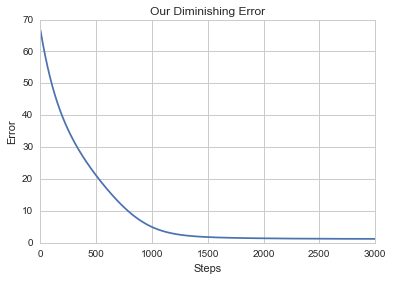

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')

plt.plot(error)
plt.title ("Our Diminishing Error")

plt.ylabel('Error')
plt.xlabel('Steps')

In [29]:
nR[1] - original_R[1]

array([-0.04214813,  1.85254883,  3.29512003,  0.00517555])

In [30]:
import cPickle as pickle

file_one = open('app/user_df.pkl','rb')
user_df = pickle.load(file_one)
file_one.close()
user_df.head(5)
user_df.fillna(0,inplace=True)
x = user_df.to_dict()
user_df.head()

,45200856,20627791,27891382,50638239,22300913,49226500,53804651,49631245,30014262,59932448,...,48579166,46173566,20600777,29230651,23552046,32865228,19910079,34961236,390513,46329353
1,5.0,0.0,0.0,3.0,6.0,15.0,0.0,7.0,1.0,0.0,...,0.0,0.0,0.0,3.0,11.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0.0,1.0,2.0,2.0,0.0,2.0,8.0,4.0,0.0,...,0.0,1.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0
3,11.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,366.0,0.0,0.0,0.0,49.0,0.0,0.0,1.0,2.0,16.0,...,3.0,4.0,1.0,0.0,0.0,1.0,1.0,11.0,0.0,0.0
5,0.0,0.0,0.0,6.0,2.0,0.0,0.0,11.0,5.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [33]:
import pandas as pd
summoner_names = user_df.columns.tolist()
champion_ids = user_df.index.tolist()

recommend_df = pd.DataFrame(index=champion_ids,columns=summoner_names)

In [36]:
for summoner in summoner_names:
    recommend_df[summoner] = user_df[summoner]
    
recommend_df.head()

,45200856,20627791,27891382,50638239,22300913,49226500,53804651,49631245,30014262,59932448,...,48579166,46173566,20600777,29230651,23552046,32865228,19910079,34961236,390513,46329353
1,5.0,0.0,0.0,3.0,6.0,15.0,0.0,7.0,1.0,0.0,...,0.0,0.0,0.0,3.0,11.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0.0,1.0,2.0,2.0,0.0,2.0,8.0,4.0,0.0,...,0.0,1.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0
3,11.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,366.0,0.0,0.0,0.0,49.0,0.0,0.0,1.0,2.0,16.0,...,3.0,4.0,1.0,0.0,0.0,1.0,1.0,11.0,0.0,0.0
5,0.0,0.0,0.0,6.0,2.0,0.0,0.0,11.0,5.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [61]:
def get_recommendations_ver_2(summoner_id):
    sorted_summoner = recommend_df[summoner_id].sort_values(ascending=False)
    return sorted_summoner[:3]

x = get_recommendations_ver_2(20627791)
rec_list = x.values.tolist()

rec_list

[19.0, 14.0, 10.0]

In [63]:
R = [[5,3,0,1],
     [4,0,0,1],
     [1,1,0,5],
     [1,0,0,4],
     [0,1,5,4]]

N = len(R)
M = len(R[0])


# We can assign 
K=6

# find p,q:   init U and M with randomized value between 0.0 and 1.0 with standard Gaussian distribution
P=np.random.rand(N,K)
Q=np.random.rand(M,K)

P

array([[ 0.14734336,  0.66779752,  0.08783072,  0.19388356,  0.40063044,
         0.58790968],
       [ 0.31099971,  0.05088689,  0.51576248,  0.01008827,  0.19208545,
         0.73063755],
       [ 0.75286952,  0.80451656,  0.73882009,  0.48790159,  0.21512076,
         0.75589384],
       [ 0.1866016 ,  0.40859343,  0.14964742,  0.00951182,  0.31854422,
         0.5289504 ],
       [ 0.11553271,  0.61909354,  0.95218222,  0.84359861,  0.11622061,
         0.65223409]])